In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse.linalg import eigsh, svds
from sklearn.datasets import fetch_openml

import tensor_utils as utils

np.random.seed(14159)

# Load data

In [2]:
X, y = fetch_openml('Fashion-MNIST', return_X_y=True)
X, y = X.values, y.values.astype(int)
num_classes = {0: "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat", 5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle boot"}

In [3]:
classes = [1, 4]
mask = np.zeros(y.size, dtype=bool)
for c in classes:
    mask |= (y == c)
Xc = X[mask]-np.mean(X[mask], axis=0)
yc = y[mask]
xx = np.arange(Xc.shape[0])

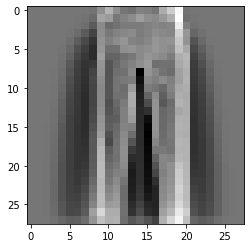

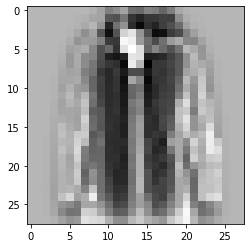

In [4]:
for c in classes:
    plt.imshow(Xc[yc == c][0].reshape(28, 28), cmap='gray')
    plt.show()

# Tensor clustering

In [5]:
Tc = Xc.reshape((-1, 28, 28))
sigma, svecs = utils.CPD1(Tc)

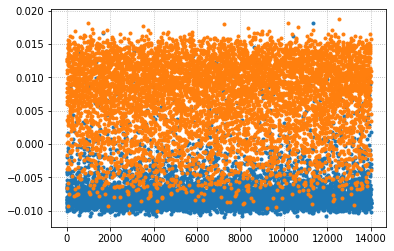

In [6]:
for c in classes:
    plt.plot(xx[yc == c], svecs[0][yc == c], ls='', marker='.')
plt.grid(ls=':')

In [7]:
y_est_T = np.where(svecs[0] > 0, classes[0], classes[1])
c_err_T = np.mean(y_est_T != yc)
c_err_T = min(c_err_T, 1-c_err_T)
print("Clustering error: {:.5%}".format(c_err_T))

Clustering error: 8.68571%


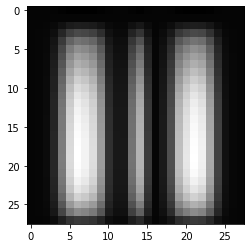

In [8]:
plt.imshow(utils.outer_vec(svecs[1:]), cmap='gray');

# Kernel clustering

In [9]:
Kc = Xc@Xc.T/Xc.shape[1]
evals, evecs = eigsh(Kc, k=1, which='LA')

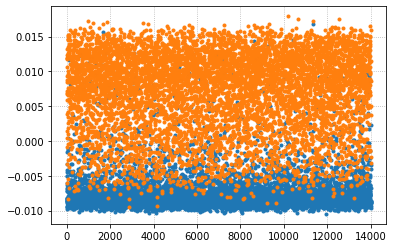

In [10]:
for c in classes:
    plt.plot(xx[yc == c], evecs[:, 0][yc == c], ls='', marker='.')
plt.grid(ls=':')

In [11]:
y_est_K = np.where(evecs[:, 0] > 0, classes[0], classes[1])
c_err_K = np.mean(y_est_K != yc)
c_err_K = min(c_err_K, 1-c_err_K)
print("Clustering error: {:.5%}".format(c_err_K))

Clustering error: 8.21429%


# SVD Clustering

In [12]:
svecsl, svals, svecsr = svds(Xc, k=1, which='LM')

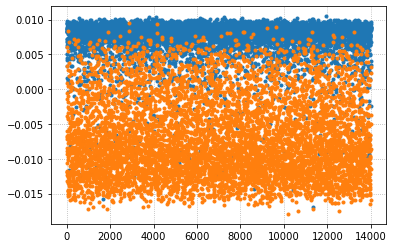

In [13]:
for c in classes:
    plt.plot(xx[yc == c], svecsl[:, 0][yc == c], ls='', marker='.')
plt.grid(ls=':')

In [14]:
y_est_X = np.where(svecsl[:, 0] > 0, classes[0], classes[1])
c_err_X = np.mean(y_est_X != yc)
c_err_X = min(c_err_X, 1-c_err_X)
print("Clustering error: {:.5%}".format(c_err_X))

Clustering error: 8.21429%


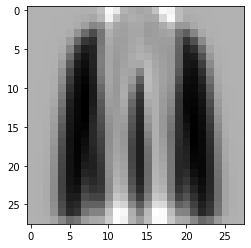

In [15]:
plt.imshow(svecsr[0, :].reshape((28, 28)), cmap='gray');